In [1]:
#https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html

In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, ConstantKernel
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [3]:
def f(x):
    return x * np.sin(x) + 3*x

In [4]:
#このあとfitに2次元配列で渡す必要がある、最初から2次元にしないとドツボにはまる

x = np.atleast_2d([np.linspace(0, 10, 100)]).T
y = f(x)

In [5]:
import random

sample_num = 5

x_sampled = []

for i in range(sample_num):
    x_sampled.append(random.uniform(0, 10))
    
y_sampled = f(np.array(x_sampled))

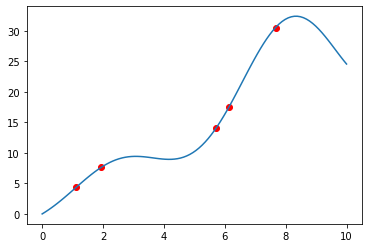

In [6]:
plt.plot(x, y)
plt.scatter(x_sampled, y_sampled, color = 'red')

In [7]:
x_sampled = np.atleast_2d([x_sampled]).T
y_sampled = np.atleast_2d([y_sampled]).T

In [8]:
y_sampled_sc = StandardScaler().fit(y_sampled)

In [9]:
kernel = ConstantKernel() * RBF() + WhiteKernel()

In [10]:
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0)

In [11]:
gpr.fit(x_sampled, y_sampled_sc.transform(y_sampled))

GaussianProcessRegressor(alpha=0,
                         kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1))

In [12]:
print(gpr.kernel_)

1.3**2 * RBF(length_scale=2.16) + WhiteKernel(noise_level=1e-05)


In [13]:
gpr.score(x_sampled, y_sampled_sc.transform(y_sampled))
#ぴったりすぎて何かおかしい、どこか間違ったか

0.9999999993154335

In [14]:
#x = np.atleast_2d(x)
y_pred, y_sigma = gpr.predict(x, return_std=True)

y_pred = y_sampled_sc.inverse_transform(y_pred)
y_sigma = y_sigma.reshape(-1, 1) * y_sampled_sc.scale_

y_pred[:10]

array([[1.41147234],
       [1.5033641 ],
       [1.63599733],
       [1.80822609],
       [2.01845759],
       [2.26465998],
       [2.54437713],
       [2.8547504 ],
       [3.19254748],
       [3.55419781]])

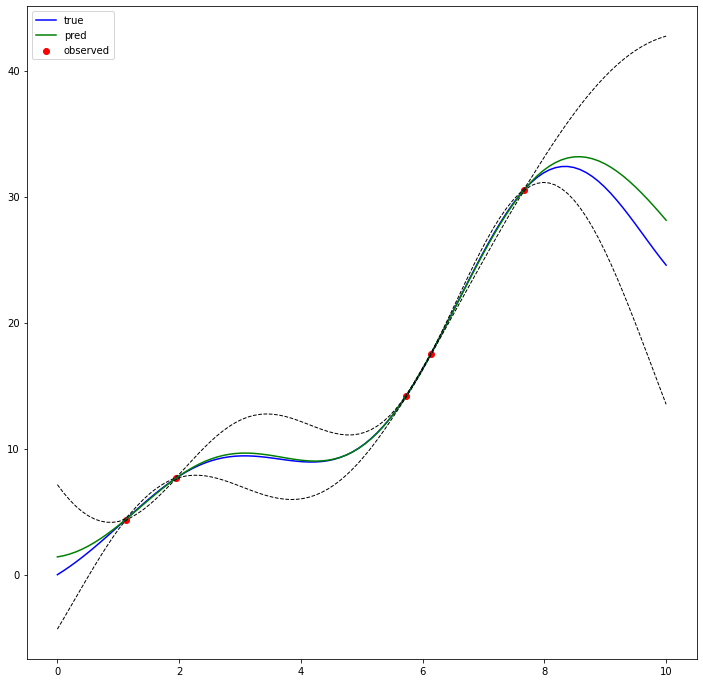

In [15]:
plt.figure(figsize=(12, 12))
plt.plot(x, y, color = 'blue', label = 'true')
plt.plot(x, y_pred, color = 'green', label = 'pred')
plt.plot(x, y_pred + 1.96*y_sigma,'k--', lw=1)
plt.plot(x, y_pred - 1.96*y_sigma,'k--', lw=1)
plt.scatter(x_sampled, y_sampled, color = 'red', label = 'observed')
plt.legend()